## 2 feature engineering <a id='2_feature engineering'></a>

### 2.1 Load relevant libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# import warnings filter
from warnings import simplefilter # ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
file='data/df_new.csv'
df=pd.read_csv(file)

In [3]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'ID', 'LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [4]:
df.dtypes

SEX          int64
EDUCATION    int64
MARRIAGE     int64
ID           int64
LIMIT_BAL    int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [5]:
df.set_index('ID')

,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,20000,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,2,2,2,120000,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,2,2,2,90000,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,2,2,1,50000,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,1,2,1,50000,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,220000,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,1,3,2,150000,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,1,2,2,30000,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### 2.2 Organize the categorical features and convert them into dummy variables

Categorical features without any order of precedence are called nominal features. There are several nominal features in this data set, for instance, sex, marriage and default. Categorical features which have some order associated with them are called ordinal features.such as education. Continous numerical features can turn into ordinal categorical features. For example, we can convert 'AGE' in df into an ordinal features.   

There are many ways to encode categorical variables. For details, we can check [the datacamp tutorial](https://www.datacamp.com/community/tutorials/categorical-data). When we use label encoding, we simply convert the category name into numbers. It's straight-forward, but it has disadvantage. Some algorithms may misinterprete the numerical values. Hence, we need one-hot encoding, which can convert categorical features into dummy variables. We can use pandas.get_dummies(), or LabelBinarizer and OneHotEncoder in the preprocessing module of scikit-learn.

In [6]:
#check nomical categorical variables and prepare to convert them into dummy variables
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [7]:
#We have the similar problem for MARRIAGE features
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [8]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
df_new=pd.get_dummies(df, columns=['MARRIAGE','SEX','EDUCATION'], drop_first=True)
df_new.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,MARRIAGE_2,MARRIAGE_3,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,1,0,1,1,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,1,1,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,0,0,0,1,0,0


### 2.3 AGE, LIMIT_BAL distribution (Should we convert them into ordinal categorical variables?)

<AxesSubplot:xlabel='AGE', ylabel='Proportion'>

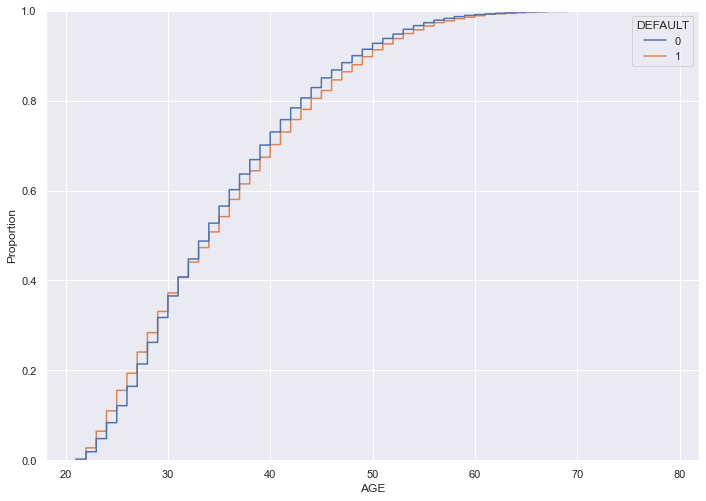

In [10]:
#age cdf distribution plot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.ecdfplot(data=df_new, x='AGE', hue='DEFAULT')

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Proportion'>

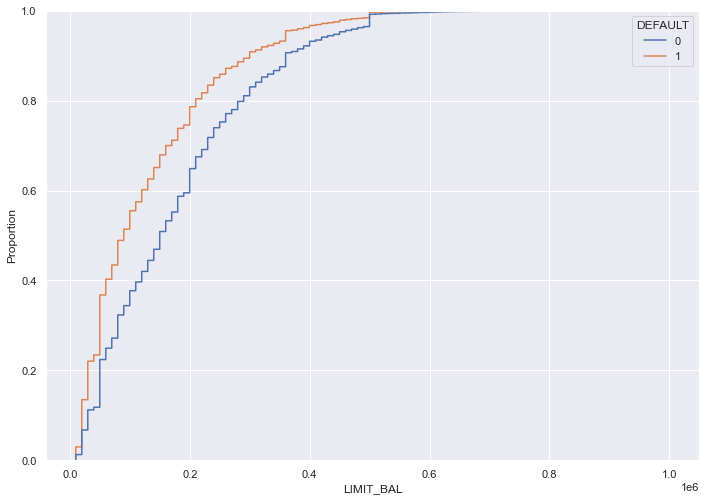

In [11]:
#LIMIT_BAL cdf distribution plot
sns.ecdfplot(data=df_new, x="LIMIT_BAL", hue='DEFAULT')

Although converting AGE and LIMIT_BAL will make our job easier, I still decide to keep the orginal data. Obviously, they are not evenly distributed. Because when we convert them into categorical data, it is hard for us to choose the bin and it can also lose information in our original data. Discretizing reduces variance and increases bias.

### 2.4 Generate new features based on the historical data

We will generate several new features to better evaluate the clients' historical activities for our modelling, based on the current historical features, LIMIT_BAL, PAY_1 to PAY_6, BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6.

1. pay_sum = sum(PAY_1 + PAY_2 + PAY_3 +PAY_4 +PAY_5 +PAY_6). It is the accumulated repayment status. The lower the better.
2. utilization_ratio_mean = (BILL_AMT1 + BILL_AMT2 +BILL_AMT3 +BILL_AMT4 +BILL_AMT5 +BILL_AMT6)/(LIMIT_BAL X6)
3. loss_give_default = sum(BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6) - sum(PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)
4. payment_ratio_mean = sum(PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)/((LIMIT_BAL)X6)
5. bill_trend = ((BILL_AMT1 + BILL_AMT2 +BILL_AMT3)-(BILL_AMT4 + BILL_AMT5 + BILL_AMT6))/3/LIMIT_BAL
7. pay__trend = ((PAY_AMT1 + PAY_AMT2 + PAY_AMT3)-(PAY_AMT4 +PAY_AMT5 +PAY_AMT6))/3/LIMIT_BAL

#### 2.4.1 PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

In [12]:
#check the time series variable sets, their correlation, and their distribution by sns.catplot
#check the past monthly payment
pay=df.filter(regex="PAY_[1-6]", axis=1)
pay.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [13]:
pay_default=pd.concat([pay, df.DEFAULT], axis=1)
pay_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


<AxesSubplot:xlabel='PAY_6', ylabel='count'>

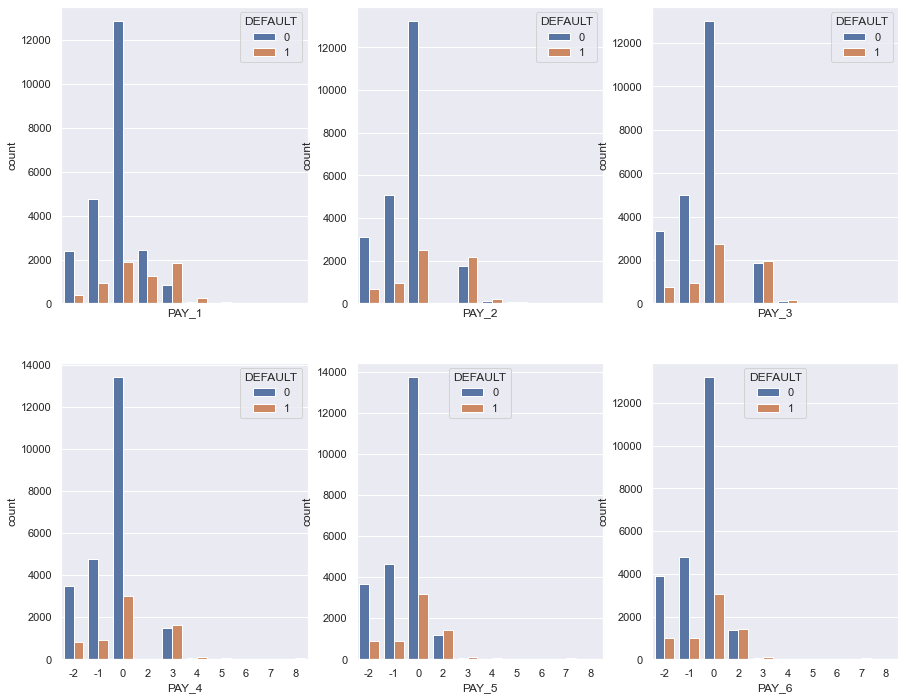

In [14]:
f, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)
sns.countplot(x="PAY_1", hue="DEFAULT", data= pay_default, ax=axes[0, 0])
sns.countplot(x="PAY_2", hue="DEFAULT", data= pay_default, ax=axes[0, 1])
sns.countplot(x="PAY_3", hue='DEFAULT', data= pay_default, ax=axes[0, 2])
sns.countplot(x="PAY_4", hue='DEFAULT', data=pay_default, ax=axes[1, 0])
sns.countplot(x="PAY_5", hue='DEFAULT', data=pay_default, ax=axes[1, 1])
sns.countplot(x="PAY_6", hue='DEFAULT', data=pay_default, ax=axes[1,2])

The measurement scale for the payment status is: -2=No consumption; -1 = pay duly; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.PAY_0 is payment status in Sep 2005; PAY_1 is payment status in Aug 2005; ...; PAY_6 is payment status in Mar 2005.
For details, check [the discussion](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608).

In [15]:
#create pay_sum
p_default=pay_default.copy()
p_default['pay_sum']=pay.agg(np.sum, axis=1)
p_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,pay_sum
0,2,2,-1,-1,-2,-2,1,-2
1,-1,2,0,0,0,2,1,3
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0,-2


<AxesSubplot:xlabel='pay_sum', ylabel='count'>

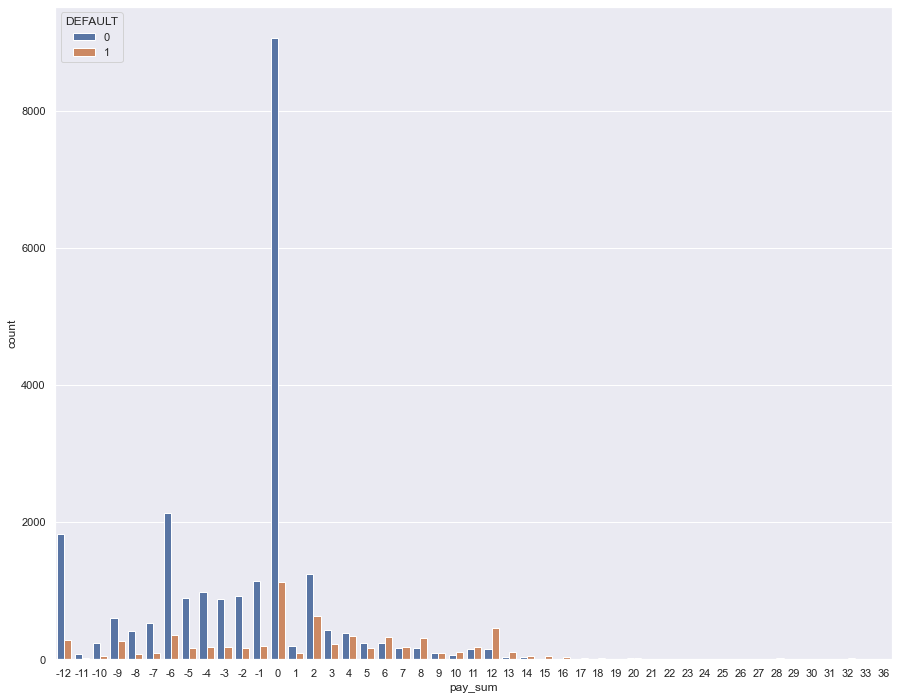

In [16]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.countplot(x="pay_sum", hue="DEFAULT", data= p_default)

Well, we can see the distribution of pay_sum is still similar to the individual PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6.

<AxesSubplot:>

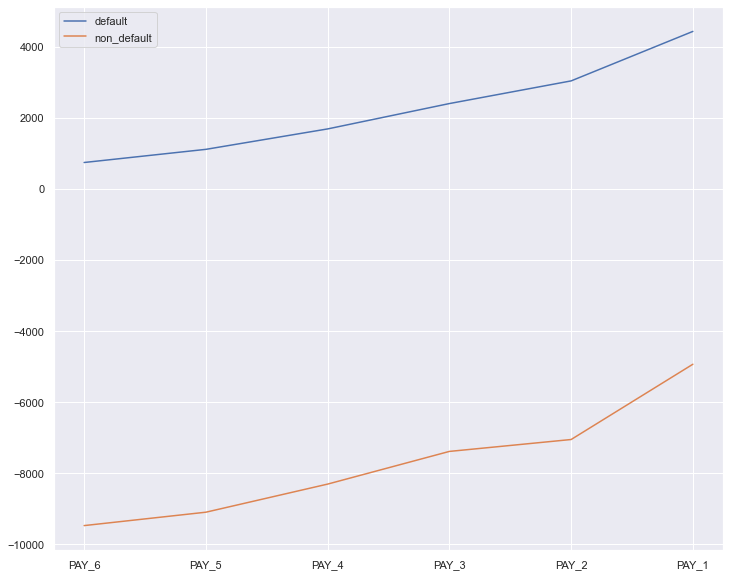

In [17]:
#What if we sum up all PAY_1, PAY_2, ..., PAY_6 individually after grouping the clients by DEFAULT?
agg_def_pay=p_default[p_default['DEFAULT']==1][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0).to_frame()
agg_nondef_pay=p_default[p_default['DEFAULT']==0][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0).to_frame()
agg_pay=pd.concat([agg_def_pay, agg_nondef_pay], axis=1)
agg_pay.columns=['default','non_default']
agg_pay.plot(figsize=(12,10))

#We can see the clients with default credit card as a group have increased high payment from March(PAY_6) to Aug (PAY_1). 
#On the contrary, the clients without default credit card as a group have consistently increased low payment from April to Sep.

#### 2.4.2 BILL_AMT1,  BILL_AMT2, BILL_AMT3,  BILL_AMT4, BILL_AMT5,  BILL_AMT6

In [18]:
#check distribution of bill_AMT1 to bill_AMT6 with default vs without default
bill=df.filter(regex="BILL_AMT[1-6]", axis=1)
b=pd.concat([bill, df.ID], axis=1)
b=b.melt(id_vars=['ID'], value_vars=['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], var_name='Month', value_name='BILL')
b.replace({'BILL_AMT1':9, 'BILL_AMT2':8, 'BILL_AMT3':7, 'BILL_AMT3':6, 'BILL_AMT4':5, 'BILL_AMT5':4, 'BILL_AMT6':3}, inplace=True)
bill_default=b.merge(df[['ID','DEFAULT']], how='left', on='ID')

BILL_AMT1 is the bill statement in Sep 2005; BILL_AMT2 is the bill statement in Aug 2005; etc 

<AxesSubplot:xlabel='Month', ylabel='BILL'>

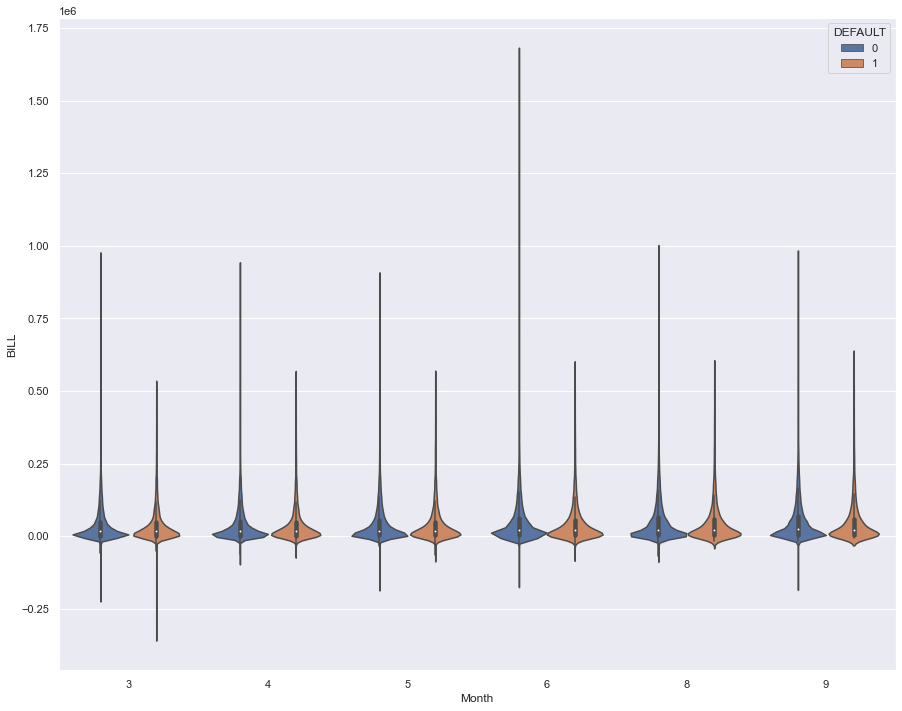

In [19]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='BILL', hue="DEFAULT", data= bill_default)

Generally speaking, the bill statement of the clients with default credit card is lower than the clients without default credit card. It is interesting.

In [20]:
#create bill_sum
bill_default=pd.concat([bill, df.DEFAULT], axis=1)
bill_default['bill_sum']=bill.agg(np.sum, axis=1)
bill_default=pd.concat([bill_default, df.LIMIT_BAL], axis=1)
bill_default.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT,bill_sum,LIMIT_BAL
0,3913,3102,689,0,0,0,1,7704,20000
1,2682,1725,2682,3272,3455,3261,1,17077,120000
2,29239,14027,13559,14331,14948,15549,0,101653,90000
3,46990,48233,49291,28314,28959,29547,0,231334,50000
4,8617,5670,35835,20940,19146,19131,0,109339,50000


<AxesSubplot:xlabel='DEFAULT', ylabel='bill_sum'>

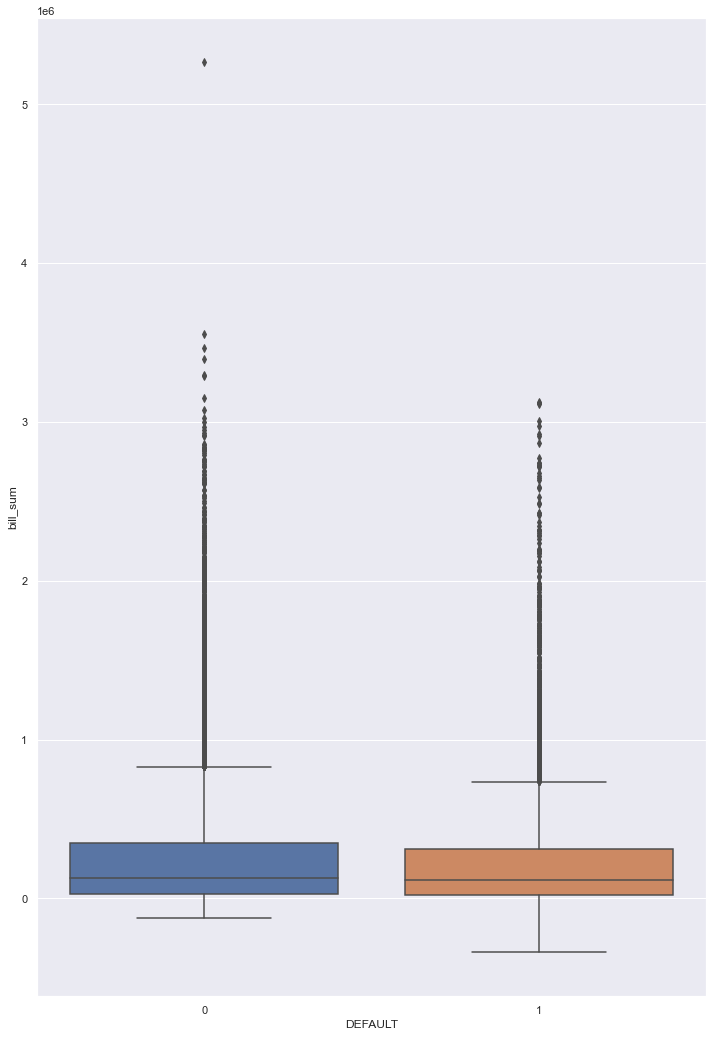

In [21]:
fig, ax = plt.subplots(figsize=(12, 18))
sns.boxplot(y= 'bill_sum', x='DEFAULT', data=bill_default)

The same pattern can be found in the sum of the bill as the individual bill statement features. People without credit card default tend to have higher bill statement than people with credit card default.

In [22]:
#What if we sum up BILL_AMT1, BILL_AMT2, ..., BILL_AMT6 after grouping the clients by DEFAULT?
agg_def_bill=bill_default[bill_default['DEFAULT']==1][['BILL_AMT1',  'BILL_AMT2', 'BILL_AMT3',  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=0).to_frame()
agg_nondef_bill=bill_default[bill_default['DEFAULT']==0][['BILL_AMT1',  'BILL_AMT2', 'BILL_AMT3',  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=0).to_frame()
agg_bill=pd.concat([agg_def_bill, agg_nondef_bill], axis=1)
agg_bill.columns=['default','non_default']
agg_bill

,default,non_default
BILL_AMT1,321906801,1214793126
BILL_AMT2,313774088,1161598167
BILL_AMT3,299825090,1110569554
BILL_AMT4,278957204,1018931265
BILL_AMT5,262388704,946953325
BILL_AMT6,253969246,912183566


<AxesSubplot:>

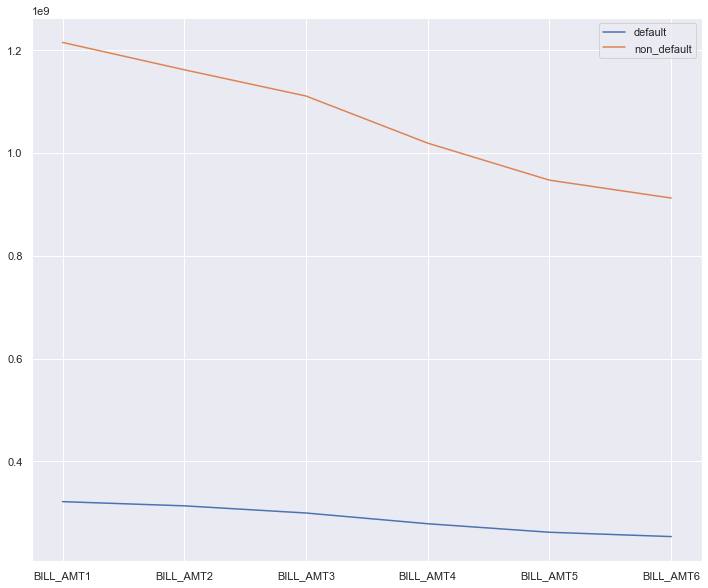

In [23]:
agg_bill.plot(figsize=(12,10))

Obviously the clients without default as a group have much higher BILL_AMT values than the ones with default. 

In [24]:
#create utilization_ratio_mean  
bill_default['mean_utilization_ratio']=round((bill_default.bill_sum/bill_default.LIMIT_BAL)/6, 4)
bill_default.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT,bill_sum,LIMIT_BAL,mean_utilization_ratio
0,3913,3102,689,0,0,0,1,7704,20000,0.0642
1,2682,1725,2682,3272,3455,3261,1,17077,120000,0.0237
2,29239,14027,13559,14331,14948,15549,0,101653,90000,0.1882
3,46990,48233,49291,28314,28959,29547,0,231334,50000,0.7711
4,8617,5670,35835,20940,19146,19131,0,109339,50000,0.3645


In [25]:
#create bill_trend
bill_default['bill_trend']=(bill_default.BILL_AMT1+bill_default.BILL_AMT2+bill_default.BILL_AMT3-(bill_default.BILL_AMT4+bill_default.BILL_AMT5+bill_default.BILL_AMT6))/3
bill_default.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT,bill_sum,LIMIT_BAL,mean_utilization_ratio,bill_trend
0,3913,3102,689,0,0,0,1,7704,20000,0.0642,2568.000000
1,2682,1725,2682,3272,3455,3261,1,17077,120000,0.0237,-966.333333
2,29239,14027,13559,14331,14948,15549,0,101653,90000,0.1882,3999.000000
3,46990,48233,49291,28314,28959,29547,0,231334,50000,0.7711,19231.333333
4,8617,5670,35835,20940,19146,19131,0,109339,50000,0.3645,-3031.666667


#### 2.4.3 PAY_AMT1,  PAY_AMT2, PAY_AMT3,  PAY_AMT4, PAY_AMT5,  PAY_AMT6

In [26]:
#check pay_AMT distribution
pay_AMT=df.filter(regex="PAY_AMT[1-6]", axis=1)
p=pd.concat([pay_AMT, df.ID], axis=1)
p=p.melt(id_vars=['ID'], value_vars=['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], var_name='Month', value_name='pay')
p.replace({'PAY_AMT1':9, 'PAY_AMT2':8, 'PAY_AMT3':7, 'PAY_AMT3':6, 'PAY_AMT4':5, 'PAY_AMT5':4, 'PAY_AMT6':3}, inplace=True)
p.head()

,ID,Month,pay
0,1,9,0
1,2,9,0
2,3,9,1518
3,4,9,2000
4,5,9,2000


<AxesSubplot:xlabel='Month', ylabel='pay'>

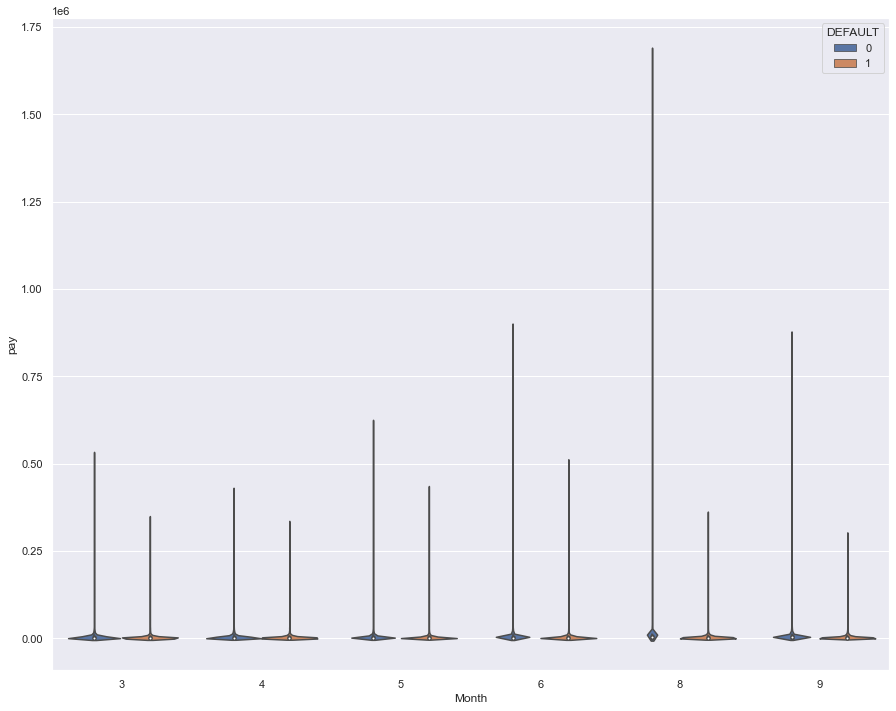

In [27]:
pay_default=p.merge(df[['ID','DEFAULT']], how='left', on='ID')
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='pay', hue="DEFAULT", data= pay_default)

<AxesSubplot:xlabel='DEFAULT', ylabel='payment_sum'>

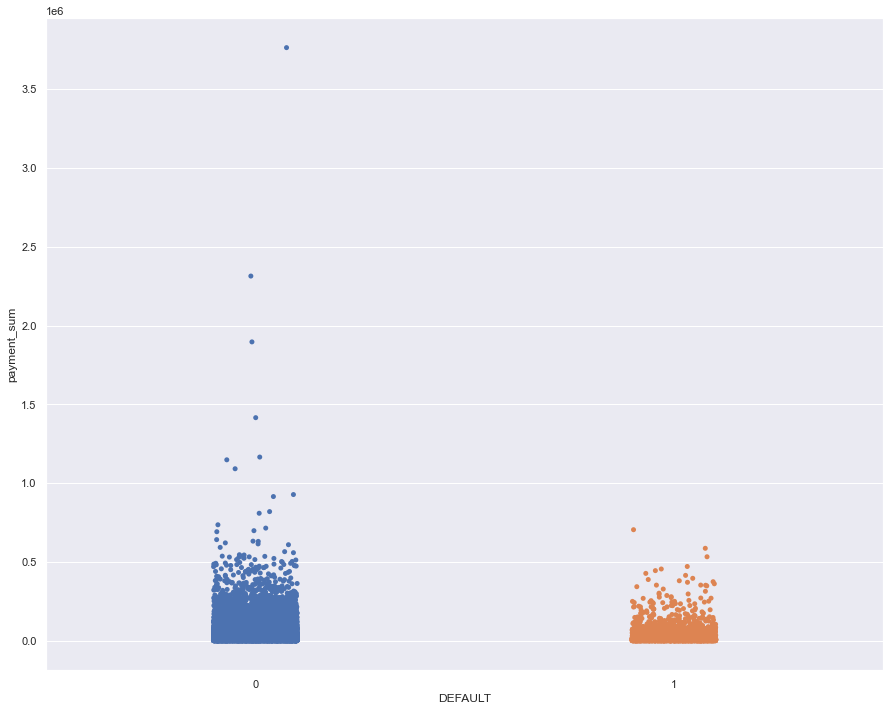

In [28]:
#create payment_sum
p_AMT=pay_AMT.copy()
p_AMT['payment_sum']=pay_AMT.agg(np.sum, axis=1)
p_AMT_default=pd.concat([p_AMT, df.DEFAULT], axis=1)
fig, ax = plt.subplots(figsize=a_dims)
sns.stripplot(x='DEFAULT', y= 'payment_sum', data=p_AMT_default)

<AxesSubplot:>

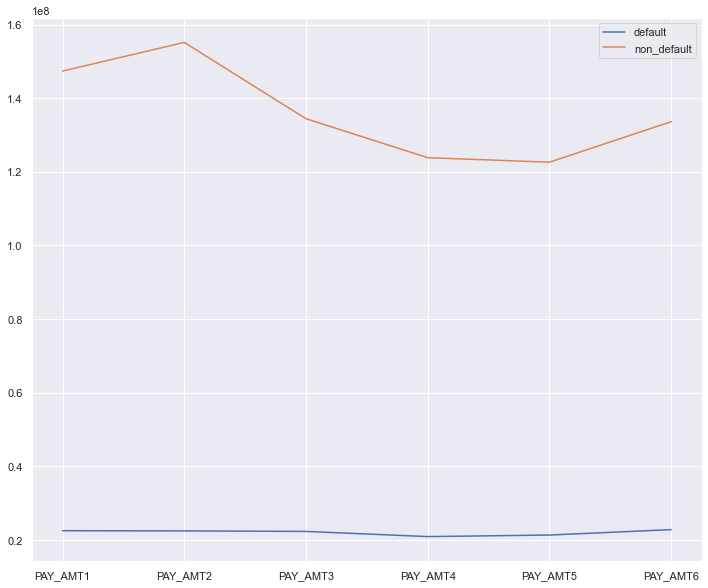

In [29]:
#What if we sum up PAY_AMT1, PAY_AMT2, ..., PAY_AMT6 after grouping the clients by DEFAULT?
agg_def_pamt=df[df['DEFAULT']==1][['PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3',  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=0).to_frame()
agg_nondef_pamt=df[df['DEFAULT']==0][['PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3',  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=0).to_frame()
agg_pamt=pd.concat([agg_def_pamt, agg_nondef_pamt], axis=1)
agg_pamt.columns=['default','non_default']
agg_pamt.plot(figsize=(12,10))

Comparing the payment statement, we can see the clients without credit card default have much higher payment than the clients with credit card default.
Combining results from 2.4.2 and 2.4.3, we can get the conclusion: The clients without default as a group have much higher bill statement but less payment than the clients with default. No wonder they got default!!

In [30]:
#create payment_ratio_mean
p_AMT_default=pd.concat([p_AMT_default, df.LIMIT_BAL], axis=1)
p_AMT_default['mean_payment_ratio']=round((p_AMT_default.payment_sum/(p_AMT_default.LIMIT_BAL*6)), 4)
p_AMT_default.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment_sum,DEFAULT,LIMIT_BAL,mean_payment_ratio
0,0,689,0,0,0,0,689,1,20000,0.0057
1,0,1000,1000,1000,0,2000,5000,1,120000,0.0069
2,1518,1500,1000,1000,1000,5000,11018,0,90000,0.0204
3,2000,2019,1200,1100,1069,1000,8388,0,50000,0.0280
4,2000,36681,10000,9000,689,679,59049,0,50000,0.1968


In [31]:
#create pay_trend
p_AMT_default['pay_trend']=(p_AMT_default.PAY_AMT1+p_AMT_default.PAY_AMT2+p_AMT_default.PAY_AMT3-p_AMT_default.PAY_AMT4-p_AMT_default.PAY_AMT5-p_AMT_default.PAY_AMT6)/3
p_AMT_default.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment_sum,DEFAULT,LIMIT_BAL,mean_payment_ratio,pay_trend
0,0,689,0,0,0,0,689,1,20000,0.0057,229.666667
1,0,1000,1000,1000,0,2000,5000,1,120000,0.0069,-333.333333
2,1518,1500,1000,1000,1000,5000,11018,0,90000,0.0204,-994.000000
3,2000,2019,1200,1100,1069,1000,8388,0,50000,0.0280,683.333333
4,2000,36681,10000,9000,689,679,59049,0,50000,0.1968,12771.000000


In [32]:
#merge features from df_new, p_AMT_default, bill_default and p_default
df_sum=pd.concat([df_new[['ID', 'LIMIT_BAL', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE', 'DEFAULT']], p_default.pay_sum, bill_default[['mean_utilization_ratio', 'bill_trend', 'bill_sum']], p_AMT_default[['pay_trend', 'payment_sum', 'mean_payment_ratio']]], axis=1)
df_sum.head()

,ID,LIMIT_BAL,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE,DEFAULT,pay_sum,mean_utilization_ratio,bill_trend,bill_sum,pay_trend,payment_sum,mean_payment_ratio
0,1,20000,1,1,0,0,0,0,24,1,-2,0.0642,2568.000000,7704,229.666667,689,0.0057
1,2,120000,1,1,0,0,1,0,26,1,3,0.0237,-966.333333,17077,-333.333333,5000,0.0069
2,3,90000,1,1,0,0,1,0,34,0,0,0.1882,3999.000000,101653,-994.000000,11018,0.0204
3,4,50000,1,1,0,0,0,0,37,0,0,0.7711,19231.333333,231334,683.333333,8388,0.0280
4,5,50000,0,1,0,0,0,0,57,0,-2,0.3645,-3031.666667,109339,12771.000000,59049,0.1968


In [33]:
#create loss_given_default
df_sum['6_month_loss_given_default']=df_sum.bill_sum-df_sum.payment_sum
df_sum.head()

,ID,LIMIT_BAL,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE,DEFAULT,pay_sum,mean_utilization_ratio,bill_trend,bill_sum,pay_trend,payment_sum,mean_payment_ratio,6_month_loss_given_default
0,1,20000,1,1,0,0,0,0,24,1,-2,0.0642,2568.000000,7704,229.666667,689,0.0057,7015
1,2,120000,1,1,0,0,1,0,26,1,3,0.0237,-966.333333,17077,-333.333333,5000,0.0069,12077
2,3,90000,1,1,0,0,1,0,34,0,0,0.1882,3999.000000,101653,-994.000000,11018,0.0204,90635
3,4,50000,1,1,0,0,0,0,37,0,0,0.7711,19231.333333,231334,683.333333,8388,0.0280,222946
4,5,50000,0,1,0,0,0,0,57,0,-2,0.3645,-3031.666667,109339,12771.000000,59049,0.1968,50290


In [34]:
#round bill_trend, pay_trend
df_sum['bill_trend']=round(df_sum.bill_trend, 0)
df_sum['pay_trend']=round(df_sum.pay_trend, 0)
df_sum.head()

,ID,LIMIT_BAL,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE,DEFAULT,pay_sum,mean_utilization_ratio,bill_trend,bill_sum,pay_trend,payment_sum,mean_payment_ratio,6_month_loss_given_default
0,1,20000,1,1,0,0,0,0,24,1,-2,0.0642,2568.0,7704,230.0,689,0.0057,7015
1,2,120000,1,1,0,0,1,0,26,1,3,0.0237,-966.0,17077,-333.0,5000,0.0069,12077
2,3,90000,1,1,0,0,1,0,34,0,0,0.1882,3999.0,101653,-994.0,11018,0.0204,90635
3,4,50000,1,1,0,0,0,0,37,0,0,0.7711,19231.0,231334,683.0,8388,0.0280,222946
4,5,50000,0,1,0,0,0,0,57,0,-2,0.3645,-3032.0,109339,12771.0,59049,0.1968,50290


In [35]:
#make sure the data type is correct before we do data pre-processing
df_sum.dtypes

ID                              int64
LIMIT_BAL                       int64
SEX_2                           uint8
EDUCATION_2                     uint8
EDUCATION_3                     uint8
EDUCATION_4                     uint8
MARRIAGE_2                      uint8
MARRIAGE_3                      uint8
AGE                             int64
DEFAULT                         int64
pay_sum                         int64
mean_utilization_ratio        float64
bill_trend                    float64
bill_sum                        int64
pay_trend                     float64
payment_sum                     int64
mean_payment_ratio            float64
6_month_loss_given_default      int64
dtype: object

<AxesSubplot:>

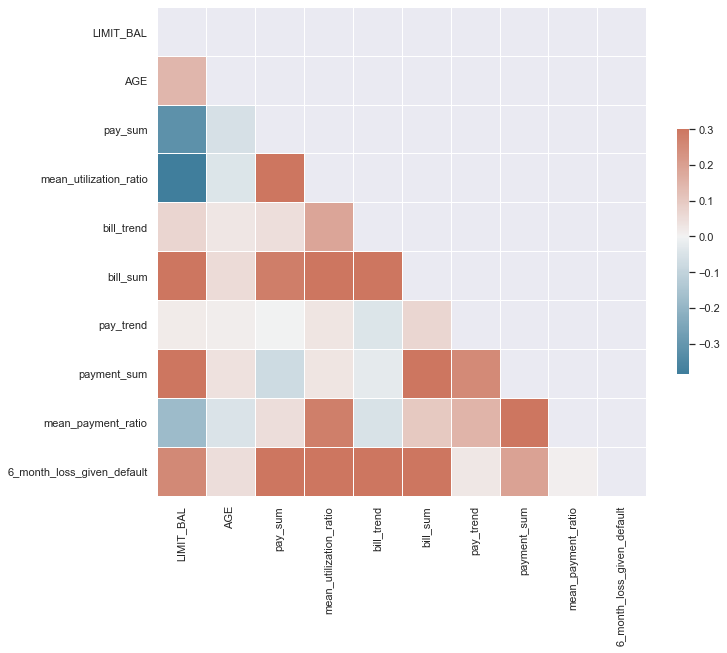

In [36]:
corr=df_sum[['LIMIT_BAL', 'AGE', 'pay_sum', 'mean_utilization_ratio', 'bill_trend', 'bill_sum', 'pay_trend', 'payment_sum', 'mean_payment_ratio', '6_month_loss_given_default']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Luckily, we didn't find obvious collinearity between them in this data set. Now we are ready for data processing for modelling.

<AxesSubplot:xlabel='bill_trend', ylabel='Proportion'>

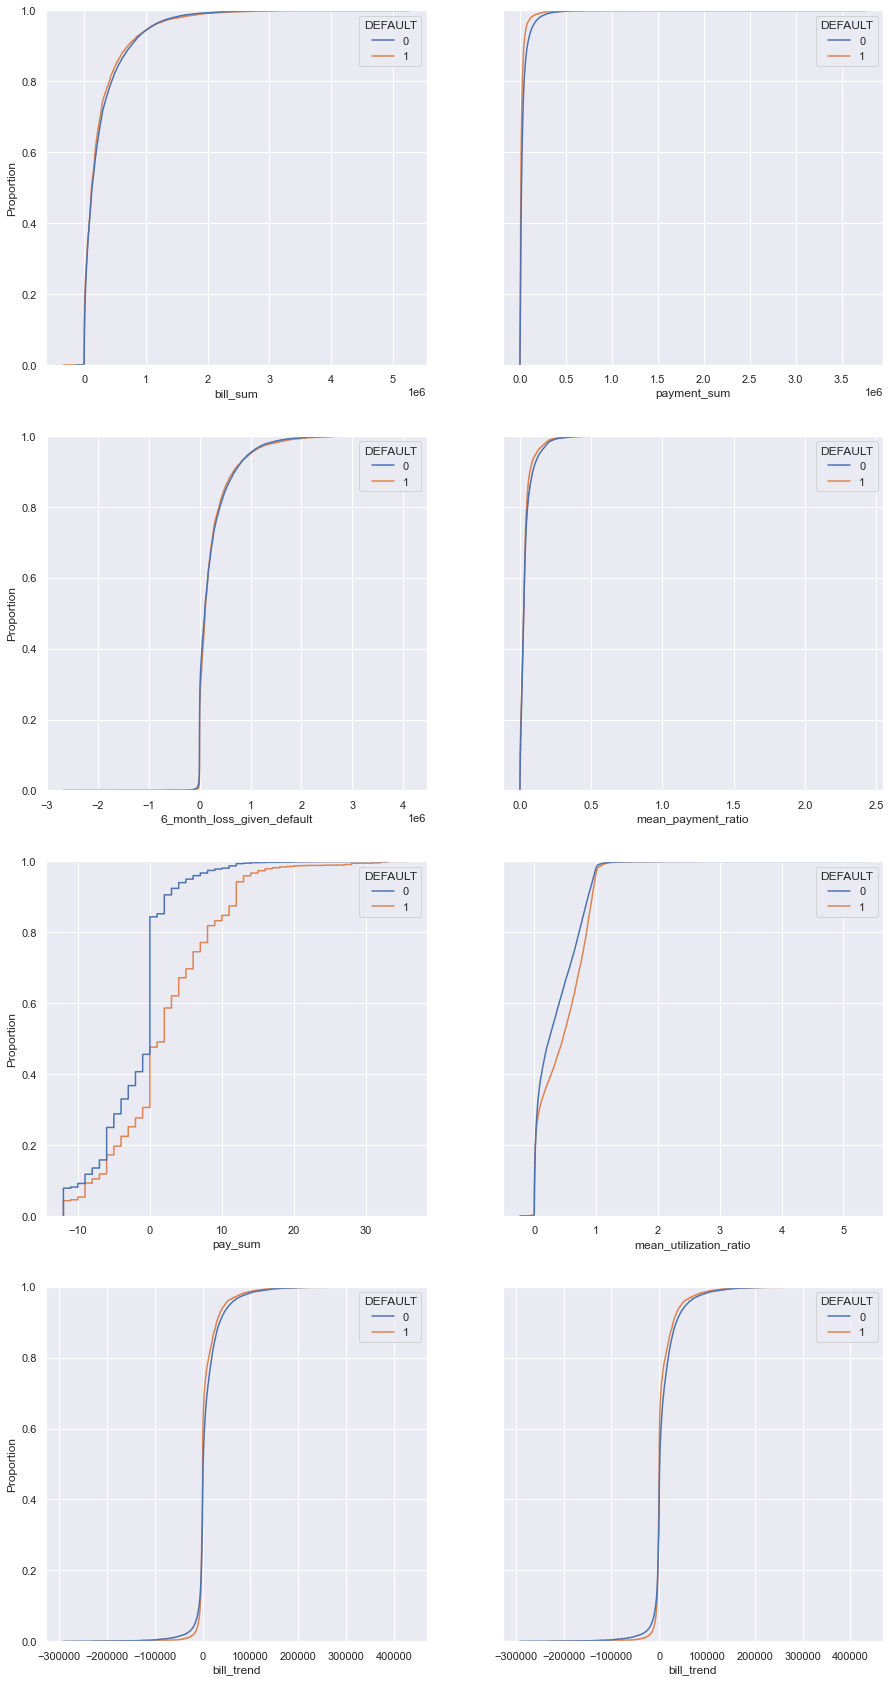

In [37]:
#Let's check the distribution of these constructed features across DEFAULT
f, axes=plt.subplots(4, 2, figsize=(15, 30), sharey=True)
sns.ecdfplot(data=df_sum, x='bill_sum', hue='DEFAULT', ax=axes[0, 0])
sns.ecdfplot(data=df_sum, x='payment_sum', hue='DEFAULT', ax=axes[0, 1])
sns.ecdfplot(data=df_sum, x='6_month_loss_given_default', hue='DEFAULT', ax=axes[1, 0])
sns.ecdfplot(data=df_sum, x='mean_payment_ratio', hue='DEFAULT', ax=axes[1,1])
sns.ecdfplot(data=df_sum, x='pay_sum', hue='DEFAULT', ax=axes[2,0])
sns.ecdfplot(data=df_sum, x='mean_utilization_ratio', hue='DEFAULT', ax=axes[2,1])
sns.ecdfplot(data=df_sum, x='bill_trend', hue='DEFAULT', ax=axes[3,0])
sns.ecdfplot(data=df_sum, x='bill_trend', hue='DEFAULT', ax=axes[3,1])

We can easily notice the difference of pay_sum and mean_utilization_ratio between default clients and nondefault clients.

### 2.5 data splitting and pre-processing

In [38]:
#When we develop the model, we will use df_new first to explore the importance of these features and find the best model
#Then we will use df_sum to further explore and try to get some business insight using the engineered features
X1=df_new.drop(['ID', 'DEFAULT'], axis=1)
X2=df_sum.drop(['ID', 'DEFAULT'], axis=1)
y1=df_new[['DEFAULT']]
y2=df_sum[['DEFAULT']]

In [39]:
#Considering ~80% clients without default credit card vs ~20 default in our data is not very seriously imbalance, we just keep the data as they are instead of trying to use resampling technique in this project.

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2)

### 2.6 data pre-processing using standard scaler

In [40]:
#pre_processing the numerical predictors
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
X1_train_s=st_scaler.fit_transform(X1_train)
X1_test_s=st_scaler.transform(X1_test)
X2_train_s=st_scaler.fit_transform(X2_train)
X2_test_s=st_scaler.transform(X2_test)

### 2.6 export df_new, df_sum, training data set and test data set

In [41]:
df_new.to_csv('data/df_new2.csv', index=False)
df_sum.to_csv('data/df_sum.csv', index=False)

In [42]:
from numpy import savetxt
savetxt('data/X1_train_s.csv', X1_train_s, delimiter=',')
savetxt('data/X2_train_s.csv', X2_train_s, delimiter=',')
savetxt('data/X1_test_s.csv', X1_test_s, delimiter=',')
savetxt('data/X2_test_s.csv', X2_test_s, delimiter=',')
savetxt('data/y1_train.csv', y1_train, delimiter=',')
savetxt('data/y2_train.csv', y2_train, delimiter=',')
savetxt('data/y1_test.csv', y1_test, delimiter=',')
savetxt('data/y2_test.csv', y2_test, delimiter=',')